/var/folders/c3/j8w7q93153v6x8_vm3r3czv00000gn/T/ipykernel_2429/2415331298.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * sqrt(tau))
/var/folders/c3/j8w7q93153v6x8_vm3r3czv00000gn/T/ipykernel_2429/2415331298.py:18: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * sqrt(tau))


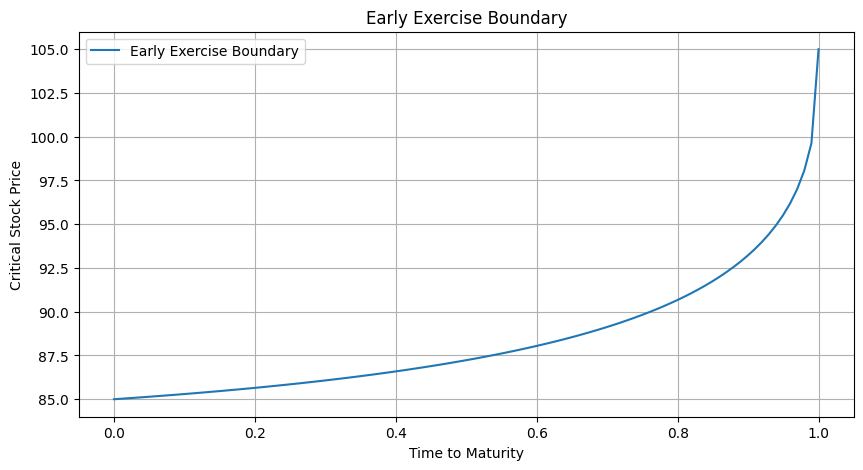

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.stats import norm
from math import log, sqrt, exp

# Define the parameters
K = 105  
S0 = 100  
T = 1  
r = 0.05 
sigma = 0.3  
N = 100  # time step we deciede to take 100 steps

# Black-Scholes formula for a European put option
def european_put(S, K, t, r, sigma):
    tau = T-t 
    d1 = (log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * sqrt(tau))
    d2 = d1 - sigma * sqrt(tau)
    put_price = K * exp(-r * tau) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Function to find the stock price S* at each time step
def early_exercise_curve(K, T, r, sigma, N):
    times = np.linspace(0, T, N)
    prices = []

    for t in times:
        def equations(S):
            intrinsic_value = max(K - S, 0)
            put_price = european_put(S, K, t, r, sigma)
            return intrinsic_value - put_price

        # root finding
        try:
            S_star = brentq(equations, 0.01, K, xtol=1e-8)
        except ValueError:
            S_star = None  # If no solution is found
        # If t = 1, the optimal price is the strike price
        if t == T:
            S_star = K
        prices.append(S_star)
        #print(price)
    return times, prices

# Calculate the early exercise curve
times, prices = early_exercise_curve(K, T, r, sigma, N)

# Plotting the early exercise curve
plt.figure(figsize=(10, 5))
plt.plot(times, prices, label='Early Exercise Boundary')
plt.title('Early Exercise Boundary')
plt.xlabel('Time to Maturity')
plt.ylabel('Critical Stock Price')
plt.legend()
plt.grid(True)
plt.show()
